In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from matplotlib.pyplot import figure

In [2]:
def imgpad(img, r):
    """Agrega un espacio de padding para la imagen en formato de numpy array.
    
    Args:
        img (numpy array): imagen conformada por el array en formato de numpy
        r (int): cantidad de pixeles de padding que se quieren
    
    Returns:
        result (img): presentacion de la imagen con el padding agregado
    """
    filas = img.shape[0]
    columnas = img.shape[1]
    img_padded = np.zeros((filas+r*2, columnas+r*2), int)
    filas = img.shape[0]
    columnas = img.shape[1]
    for i in range(filas):
        for j in range(columnas):
            img_padded[i+r][j+r] = img[i][j]
    return img_padded

In [3]:
def connected_c(img):
    """ Etiqueta los componentes conectados de la imagen binaria img.
    
    Args:
        img (numpy array): imagen conformada por el array en formato de numpy
    
    Returns:
        result (img): numpy array etiquetado
    """
    label = 1
    equivalencias = []
    filas = img.shape[0]
    columnas = img.shape[1]
    img_lab = np.zeros((filas, columnas), int)
    
    for f in range(0, filas):
        for c in range(0, columnas):
            if img[f][c] != 0:
                    neig_img = [img_lab[f-1,c-1],img_lab[f,c-1],img_lab[f+1,c-1],img_lab[f-1,c],img_lab[f-1,c+1],
                        img_lab[f,c+1],img_lab[f+1,c],img_lab[f+1,c+1]]
                    
                    if (len([i for i in neig_img if i > 0])) == 0:
                        img_lab[f][c] = label
                        label+=1
                        
                    else:
                        temp_min = min(i for i in neig_img if i > 0)
                        img_lab[f][c] = temp_min
                        vec_eq = np.unique(neig_img)
                        vec_eq = vec_eq[vec_eq != 0]
                        vec_eq.tolist()
                        
                        if len(vec_eq)>1:
                            equivalencias.append(vec_eq)

    equivalencias =  [list(item) for item in set(tuple(row) for row in equivalencias)]              
    
    for i in equivalencias:             
        if len([item for item in equivalencias[0] if item in equivalencias[1]]) > 0:
            lo = equivalencias[0] + equivalencias[1]
            equivalencias[0] = list(set(lo))
            del equivalencias[1]
        
    for f in range(0, filas):
        for c in range(0, columnas):
            if img_lab[f][c] != 0:
                for i in range(0,len(equivalencias)):
                    if img_lab[f][c] in equivalencias[i]:
                        img_lab[f][c] = min(equivalencias[i])
    return img_lab
    

In [38]:
def labelview(labels, inp):
    """ Asigna un color a cada etiqueta de la matriz labels de tipo np.array (imagen) 
    que ha sido etiquetada por un algoritmo CCL.
    Hace uso de la función plot.imgview del módulo plot.py para visualizar dichos colores asignados.
    
    Args:
        labels (numpy array): imagen conformada por el array en formato de numpy
    
    Returns:
        result (img): numpy array etiquetado
    """
    figure(num=None, figsize=(20, 10), dpi=80)
    title = ['Input: fprint3.pgm','Output']
    img = cv.imread('fprint3.pgm',0)
    
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(221)
    plt.imshow(img,'gray')
    ax1.set_title(title[0])
    plt.axis('off')
    ax2 = fig.add_subplot(222)
    plt.imshow(labels, cmap=inp)
    ax2.set_title(title[1])
    plt.axis('off')

    plt.show()

    return

In [ ]:
CMRmap_r
GnBu_r
Greens_r
OrRd_r
twilight_shifted_r
pink
viridis_r
PRGn
PiYG
PiYG_r
PuBu_r
PuRd_r


CMRmap_r
RdBu
RdBu_r
RdGy_r
RdYlBu_r
Spectral
cubehelix_r -
gist_earth_r -
gist_ncar_r -
gist_ncar -
gist_stern
gnuplot

In [203]:
#Nathalia Morales carnet 20160295
import os
import sys
import plot
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

imga = str(sys.argv[1])
nameoutput = str(sys.argv[2])


def imgpad(img, r):
    """Agrega un espacio de padding para la imagen en formato de numpy array.
    
    Args:
        img (numpy array): imagen conformada por el array en formato de numpy
        r (int): cantidad de pixeles de padding que se quieren
    
    Returns:
        result (img): presentacion de la imagen con el padding agregado
    """
    try:
        img.shape
        #print("checked for shape imgpad".format(img.shape))
        filas = img.shape[0]
        columnas = img.shape[1]
    except AttributeError:
        print("shape not found imgpad")
        filas = 0
        columnas = 0
    img_padded = np.zeros((filas+r*2, columnas+r*2), int)
    for i in range(filas):
        for j in range(columnas):
            img_padded[i+r][j+r] = img[i][j]
    return img_padded

def connected_c(img):
    """ Etiqueta los componentes conectados de la imagen binaria img.
    
    Args:
        img (numpy array): imagen conformada por el array en formato de numpy
    
    Returns:
        result (img): numpy array etiquetado
    """
    label = 1
    equivalencias = []
    try:
        img.shape
        #print("checked for shape connected_c".format(img.shape))
        filas = img.shape[0]
        columnas = img.shape[1]
    except AttributeError:
        print("shape not found connected_c")
        filas = 0
        columnas = 0
        
    img_lab = np.zeros((filas, columnas), int)
    
    for f in range(0, filas):
        for c in range(0, columnas):
            if img[f][c] != 0:
                    neig_img = [img_lab[f-1,c-1],img_lab[f,c-1],img_lab[f+1,c-1],img_lab[f-1,c],img_lab[f-1,c+1],
                        img_lab[f,c+1],img_lab[f+1,c],img_lab[f+1,c+1]]
                    
                    if (len([i for i in neig_img if i > 0])) == 0:
                        img_lab[f][c] = label
                        label+=1
                        
                    else:
                        temp_min = min(i for i in neig_img if i > 0)
                        img_lab[f][c] = temp_min
                        vec_eq = np.unique(neig_img)
                        vec_eq = vec_eq[vec_eq != 0]
                        vec_eq.tolist()
                        
                        if len(vec_eq)>1:
                            equivalencias.append(vec_eq)

    equivalencias =  [list(item) for item in set(tuple(row) for row in equivalencias)]              
    
    for i in equivalencias:             
        if len([item for item in equivalencias[0] if item in equivalencias[1]]) > 0:
            lo = equivalencias[0] + equivalencias[1]
            equivalencias[0] = list(set(lo))
            del equivalencias[1]
        
    for f in range(0, filas):
        for c in range(0, columnas):
            if img_lab[f][c] != 0:
                for i in range(0,len(equivalencias)):
                    if img_lab[f][c] in equivalencias[i]:
                        img_lab[f][c] = min(equivalencias[i])
    return img_lab

def labelview(labels):
    """ Asigna un color a cada etiqueta de la matriz labels de tipo np.array (imagen) 
    que ha sido etiquetada por un algoritmo CCL.
    Hace uso de la función plot.imgview del módulo plot.py para visualizar dichos colores asignados.
    
    Args:
        labels (numpy array): imagen conformada por el array en formato de numpy
    
    Returns:
        result (img): numpy array etiquetado
    """
    figure(num=None, figsize=(10, 10), dpi=80)
    title = [imga]
    
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(221)
    plt.imshow(labels,'gist_ncar')
    ax1.set_title(title[0])
    plt.axis('off')

    plt.show()

    return

def main():
    img = cv.imread(imga,0)
    #imgUMat = np.float32(img)
    #kernel = np.ones((3,3), np.uint8) 
    #dilation_image = cv.dilate(imgUMat, kernel, iterations=1)
    #ret,reverse = cv.threshold(dilation_image,150,255,cv.THRESH_BINARY)
    #img = cv.erode(reverse, kernel, iterations=1)
    ret,img = cv.threshold(img,120,255,cv.THRESH_BINARY_INV)
    img_padded = imgpad(img, 1)
    img_2 = connected_c(img_padded)
    print(labelview(img_2))
    return

#if __name__ == '__main__':
#    main()

<Figure size 1600x800 with 0 Axes>

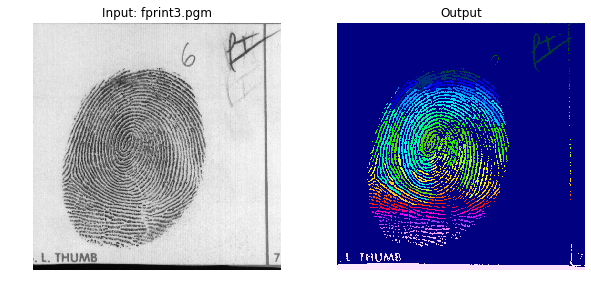

None


In [197]:
print(labelview(img_2, 'gist_ncar'))

ValueError: Format 'json' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

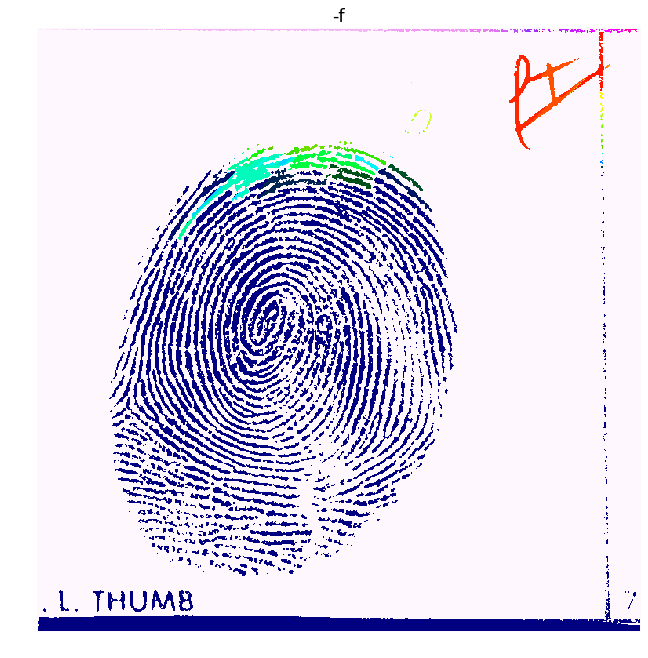

In [200]:
img = cv.imread('fprint3.pgm',0)
ret,img = cv.threshold(img,120,255,cv.THRESH_BINARY_INV)
img_padded = imgpad(img, 1)
img_2 = connected_c(img_padded)
print(labelview(img_2))

<Figure size 800x800 with 0 Axes>

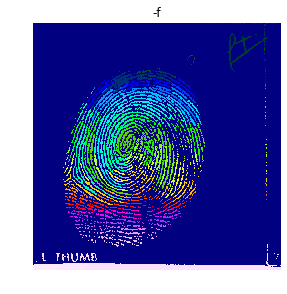

None


In [204]:
print(labelview(img_2))

In [195]:
img = cv.imread('fprint3.pgm',0)
ret,img = cv.threshold(img,120,255,cv.THRESH_BINARY_INV)
img_padded = imgpad(img, 1)
#img.shape
img_2 = connected_c(img_padded)